# 1. Data loading

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from imblearn.over_sampling import RandomOverSampler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('datasets.csv')
df.head()

,PRVDR_NUM,CLOSURE_INDEX,OWNERSHIP_TYPE,MEDICAID_PRTCPTN_CD,DSH_STATUS,ACADEMIC_STATUS,NUM_BEDS_1,TOT_BEDS_DAYS_1,INPAT_BEDS_DAYS_1,INPAT_DISCH_1,TOT_INCOME_1,TOT_COSTS_1,OPEX_1,MARGIN_1,INPA_REV_1,OUTPA_REV_1,TOT_REV_1,NUM_BEDS_2,TOT_BEDS_DAYS_2,INPAT_BEDS_DAYS_2,INPAT_DISCH_2,TOT_INCOME_2,TOT_COSTS_2,OPEX_2,MARGIN_2,INPA_REV_2,OUTPA_REV_2,TOT_REV_2,NUM_BEDS_3,TOT_BEDS_DAYS_3,INPAT_BEDS_DAYS_3,INPAT_DISCH_3,TOT_INCOME_3,TOT_COSTS_3,OPEX_3,MARGIN_3,INPA_REV_3,OUTPA_REV_3,TOT_REV_3,ed1_minutes,ed1_denom,ed2_minutes,ed2_denom,imm2_share,imm2_denom,imm3_share,imm3_denom,op5_minutes,op5_denom,op18_minutes,op18_denom,op20_minutes,op20_denom,op21_minutes,op21_denom,hf_mort_rate,hf_mort_npatients,pn_mort_rate,pn_mort_npatients,hf_readm_rate,hf_readm_npatients,pn_readm_rate,pn_readm_npatients,all_readm_rate,all_readm_npatients,copd_mort_npatients,copd_mort_rate,copd_readm_npatients,copd_readm_rate,Q_COMP_1,Q_COMP_2,Q_COMP_3,Q_COMP_4,Q_COMP_5,Q_COMP_6,Q_CLEAN,Q_QUIET,Q_RECOMMEND,Q_OVERALL,HOSP_ADMIN,HOSP_BEDS,POP_2019,POP_2010,POP_2000,POP_UNDER65,TOT_BIRTHS,TOT_DEATHS,PER_INCOME,MEDIAN_HOUSE_INCOME,POVERTY_RATE,UNDER65_NO_INSURANCE,UNEMP_RATE
0,10005,0,1,1,1.0,0.0,194.245902,63773.997970,27900.073750,7074.525848,2.096448e+08,1.936048e+08,1.936048e+08,0.076510,1.253402e+08,3.627598e+08,4.881000e+08,201.731507,66331.99818,28753.831420,7511.317558,1.823305e+08,1.732660e+08,1.732660e+08,0.049715,1.175326e+08,3.523981e+08,469930699.6,204.0,67159.99800,30234.292260,8708.813448,1.606933e+08,1.598973e+08,1.598973e+08,0.004953,1.147149e+08,3.337260e+08,4.484409e+08,240.0,1230.0,72.0,1130.0,0.97,916.0,0.80,1643.0,14.0,283.0,113.0,1426.0,23.0,1488.0,67.0,485.0,0.158,349.0,0.202,850.0,0.237,362.0,0.156,841.0,0.144,2545.0,546.0,0.097,627.0,0.173,2.77,2.84,2.49,2.69,2.45,0.89,2.49,2.58,2.65,2.67,6818.0,183.0,96774.0,93019.0,82231,78805.0,1409.0,1151.0,37345.0,45983.0,15.7,15.4,2.5
1,10007,0,1,1,1.0,0.0,45.000000,14639.999530,3919.852868,1160.682319,2.291090e+07,2.067364e+07,2.067364e+07,0.097650,2.057171e+07,3.566245e+07,5.623416e+07,45.000000,14599.99960,3439.220878,1092.597065,1.832241e+07,1.834195e+07,1.834195e+07,-0.001066,1.646702e+07,3.359202e+07,50059037.0,45.0,14599.99956,3311.342367,1136.835583,1.748432e+07,1.828360e+07,1.828360e+07,-0.045714,1.706488e+07,3.394204e+07,5.100693e+07,150.0,528.0,75.0,528.0,0.99,297.0,0.54,274.0,7.0,50.0,121.0,1490.0,40.0,1705.0,62.0,59.0,0.150,93.0,0.223,210.0,0.219,98.0,0.173,197.0,0.166,590.0,109.0,0.081,137.0,0.197,2.73,2.83,2.63,2.62,2.60,0.88,2.53,2.72,2.63,2.70,4268.0,137.0,37049.0,37765.0,37631,28790.0,423.0,560.0,36756.0,42189.0,17.2,12.5,3.4
2,10008,0,2,1,1.0,0.0,29.000000,10643.000000,1648.000000,327.000000,2.536304e+06,1.289844e+07,1.289854e+07,-4.085527,3.398768e+06,7.044102e+06,1.044287e+07,29.000000,10585.00000,1609.000000,376.000000,1.162346e+07,1.251062e+07,1.251062e+07,-0.076325,1.313456e+07,2.942669e+07,42561246.0,29.0,10585.00000,1323.000000,314.000000,1.038102e+07,1.194212e+07,1.194212e+07,-0.150381,1.455168e+07,2.246498e+07,3.701666e+07,198.0,184.0,76.0,184.0,0.91,286.0,0.53,158.0,5.0,17.0,86.0,370.0,22.0,384.0,41.0,51.0,NaN,NaN,0.163,67.0,0.221,25.0,0.161,69.0,0.144,148.0,27.0,0.084,31.0,0.189,2.80,2.93,2.77,2.77,2.64,0.84,2.73,2.69,2.68,2.71,1973.0,93.0,13772.0,13906.0,13665,10990.0,144.0,185.0,37118.0,43163.0,16.8,13.4,2.8
3,10012,0,2,1,1.0,0.0,97.000000,31109.999490,8065.500953,2876.828384,5.608081e+07,5.368970e+07,5.367798e+07,0.042637,1.816954e+08,2.761094e+08,4.578048e+08,97.000000,31025.00051,8047.362058,3198.144225,5.244483e+07,5.291298e+07,5.291297e+07,-0.008926,1.808063e+08,2.973571e+08,478163443.7,97.0,31024.99954,8256.301246,3203.054747,5.128636e+07,5.199141e+07,5.199140e+07,-0.013747,1.682609e+08,2.776108e+08,4.458717e+08,199.0,394.0,54.0,394.0,0.97,303.0,0.85,803.0,1.0,65.0,137.0,404.0,32.0,426.0,58.0,185.0,0.133,142.0,0.241,265.0,0.237,162.0,0.182,274.0,0.149,741.0,155.0,0.083,182.0,0.205,2.76,2.80,2.57,2.64,2.44,0.88,2.57,2.59,2.58,2.66,3423.0,115.0,71513.0,71109.0,64452,

# 2. EDA 

In [4]:
# data shape
df.shape

(2359, 92)

In [5]:
# inspect columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 92 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRVDR_NUM             2359 non-null   int64  
 1   CLOSURE_INDEX         2359 non-null   int64  
 2   OWNERSHIP_TYPE        2359 non-null   int64  
 3   MEDICAID_PRTCPTN_CD   2359 non-null   int64  
 4   DSH_STATUS            2328 non-null   float64
 5   ACADEMIC_STATUS       2330 non-null   float64
 6   NUM_BEDS_1            2338 non-null   float64
 7   TOT_BEDS_DAYS_1       2336 non-null   float64
 8   INPAT_BEDS_DAYS_1     2337 non-null   float64
 9   INPAT_DISCH_1         2336 non-null   float64
 10  TOT_INCOME_1          2341 non-null   float64
 11  TOT_COSTS_1           2341 non-null   float64
 12  OPEX_1                2341 non-null   float64
 13  MARGIN_1              2325 non-null   float64
 14  INPA_REV_1            2341 non-null   float64
 15  OUTPA_REV_1          

In [6]:
# descriptive data analysis
df.describe().round(2)

,PRVDR_NUM,CLOSURE_INDEX,OWNERSHIP_TYPE,MEDICAID_PRTCPTN_CD,DSH_STATUS,ACADEMIC_STATUS,NUM_BEDS_1,TOT_BEDS_DAYS_1,INPAT_BEDS_DAYS_1,INPAT_DISCH_1,TOT_INCOME_1,TOT_COSTS_1,OPEX_1,MARGIN_1,INPA_REV_1,OUTPA_REV_1,TOT_REV_1,NUM_BEDS_2,TOT_BEDS_DAYS_2,INPAT_BEDS_DAYS_2,INPAT_DISCH_2,TOT_INCOME_2,TOT_COSTS_2,OPEX_2,MARGIN_2,INPA_REV_2,OUTPA_REV_2,TOT_REV_2,NUM_BEDS_3,TOT_BEDS_DAYS_3,INPAT_BEDS_DAYS_3,INPAT_DISCH_3,TOT_INCOME_3,TOT_COSTS_3,OPEX_3,MARGIN_3,INPA_REV_3,OUTPA_REV_3,TOT_REV_3,ed1_minutes,ed1_denom,ed2_minutes,ed2_denom,imm2_share,imm2_denom,imm3_share,imm3_denom,op5_minutes,op5_denom,op18_minutes,op18_denom,op20_minutes,op20_denom,op21_minutes,op21_denom,hf_mort_rate,hf_mort_npatients,pn_mort_rate,pn_mort_npatients,hf_readm_rate,hf_readm_npatients,pn_readm_rate,pn_readm_npatients,all_readm_rate,all_readm_npatients,copd_mort_npatients,copd_mort_rate,copd_readm_npatients,copd_readm_rate,Q_COMP_1,Q_COMP_2,Q_COMP_3,Q_COMP_4,Q_COMP_5,Q_COMP_6,Q_CLEAN,Q_QUIET,Q_RECOMMEND,Q_OVERALL,HOSP_ADMIN,HOSP_BEDS,POP_2019,POP_2010,POP_2000,POP_UNDER65,TOT_BIRTHS,TOT_DEATHS,PER_INCOME,MEDIAN_HOUSE_INCOME,POVERTY_RATE,UNDER65_NO_INSURANCE,UNEMP_RATE
count,2359.00,2359.00,2359.00,2359.00,2328.00,2330.00,2338.00,2336.00,2337.00,2336.00,2.341000e+03,2.341000e+03,2.341000e+03,2325.00,2.341000e+03,2.341000e+03,2.341000e+03,2339.00,2339.00,2338.00,2338.00,2.341000e+03,2.341000e+03,2.341000e+03,2327.00,2.341000e+03,2.341000e+03,2.341000e+03,2332.00,2331.00,2328.00,2328.00,2.332000e+03,2.332000e+03,2.332000e+03,2320.00,2.332000e+03,2.332000e+03,2.332000e+03,1523.00,1523.00,1516.00,1516.00,1700.00,1700.00,1861.00,1861.00,1421.00,1421.00,1609.00,1609.00,1614.00,1614.00,1465.00,1465.00,1542.00,1546.00,1989.00,1994.00,1581.00,1585.00,1980.00,1985.00,2103.00,2103.00,1539.00,1539.00,1584.00,1584.00,1859.00,1859.00,1858.00,1859.00,1857.00,1859.00,1859.00,1859.00,1859.00,1859.00,2357.00,2357.00,2357.00,2357.00,2359.00,2357.00,2357.00,2357.00,2351.00,2357.00,2357.00,2357.00,2357.00
mean,275304.82,0.06,1.42,0.98,0.36,0.05,43.38,14099.39,4096.75,1319.76,6.128159e+07,5.688597e+07,5.622625e+07,0.12,5.038216e+07,1.108835e+08,1.612657e+08,66.41,14482.50,4284.93,1390.57,5.833906e+07,5.581361e+07,5.526525e+07,0.02,5.018556e+07,1.122632e+08,1.624488e+08,44.47,14728.78,4458.62,1447.16,5.566577e+07,5.419379e+07,5.352641e+07,0.01,4.926595e+07,1.064416e+08,1.557076e+08,222.05,371.46,64.98,363.08,0.89,248.68,0.86,598.79,8.13,78.86,117.47,488.40,20.12,529.05,48.94,80.00,0.12,110.87,0.16,162.07,0.22,124.88,0.17,169.47,0.15,470.14,106.80,0.08,120.52,0.20,2.79,2.81,2.67,2.67,2.52,0.88,2.71,2.59,2.67,2.67,5588.02,167.20,64189.86,61594.37,56153.45,51316.04,729.51,606.09,44683.91,51143.47,14.76,11.92,4.08
std,145570.16,0.24,0.74,0.15,0.48,0.21,47.88,14534.26,7734.77,2716.30,8.860028e+07,8.013183e+07,7.938271e+07,3.60,1.096563e+08,1.631981e+08,2.662352e+08,1094.20,14637.94,7903.63,2272.42,8.371009e+07,7.764870e+07,7.691097e+07,0.18,1.071460e+08,1.629115e+08,2.631441e+08,47.62,14678.25,8021.73,2302.34,7.782726e+07,7.340792e+07,7.256656e+07,0.15,1.032415e+08,1.515631e+08,2.484836e+08,58.78,225.50,37.64,226.08,0.15,158.80,0.15,707.09,4.78,62.86,28.09,1155.45,10.20,1260.38,15.88,54.88,0.01,110.77,0.02,155.80,0.01,132.88,0.01,166.88,0.01,668.48,98.15,0.01,118.71,0.01,0.07,0.07,0.11,0.08,0.12,0.05,0.11,0.12,0.12,0.12,28711.02,697.21,281105.11,264269.71,241002.24,236484.04,3256.39,1913.14,10936.87,10997.03,5.48,5.08,1.46
min,10005.00,0.00,1.00,0.00,0.00,0.00,1.00,366.00,1.00,1.00,-1.418812e+07,0.000000e+00,0.000000e+00,-8.53,0.000000e+00,-2.981246e+06,0.000000e+00,2.00,532.00,1.00,1.00,0.000000e+00,0.000000e+00,0.000000e+00,-5.48,0.000000e+00,0.000000e+00,0.000000e+00,2.00,730.00,1.00,1.00,0.000000e+00,7.791040e+05,7.791040e+05,-2.29,0.000000e+00,0.000000e+00,0.000000e+00,59.00,11.00,0.00,11.00,0.00,11.00,0.00,27.00,0.00,2.00,51.00,11.00,0.00,12.00,5.00,11.00,0.07,1.00,0.09,2.00,0.17,4.00,0.13,2.00,0.13,25.00,25.00,0.06,25.00,0.16,1.85,1.90,2.24,2.23,2.05,0.61,2.00,2.14,1.00,1.50,0.00,0

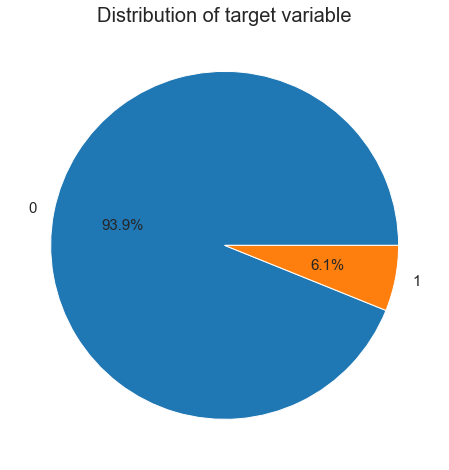

In [7]:
# visualize target variable
freq = df['CLOSURE_INDEX'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(freq, autopct='%.1f%%', labels=freq.index, textprops={'fontsize': 15})
plt.title('Distribution of target variable', fontsize=20)
plt.show()

In [8]:
hospital_features = df.columns[2:-13]
market_features = df.columns[-13:]

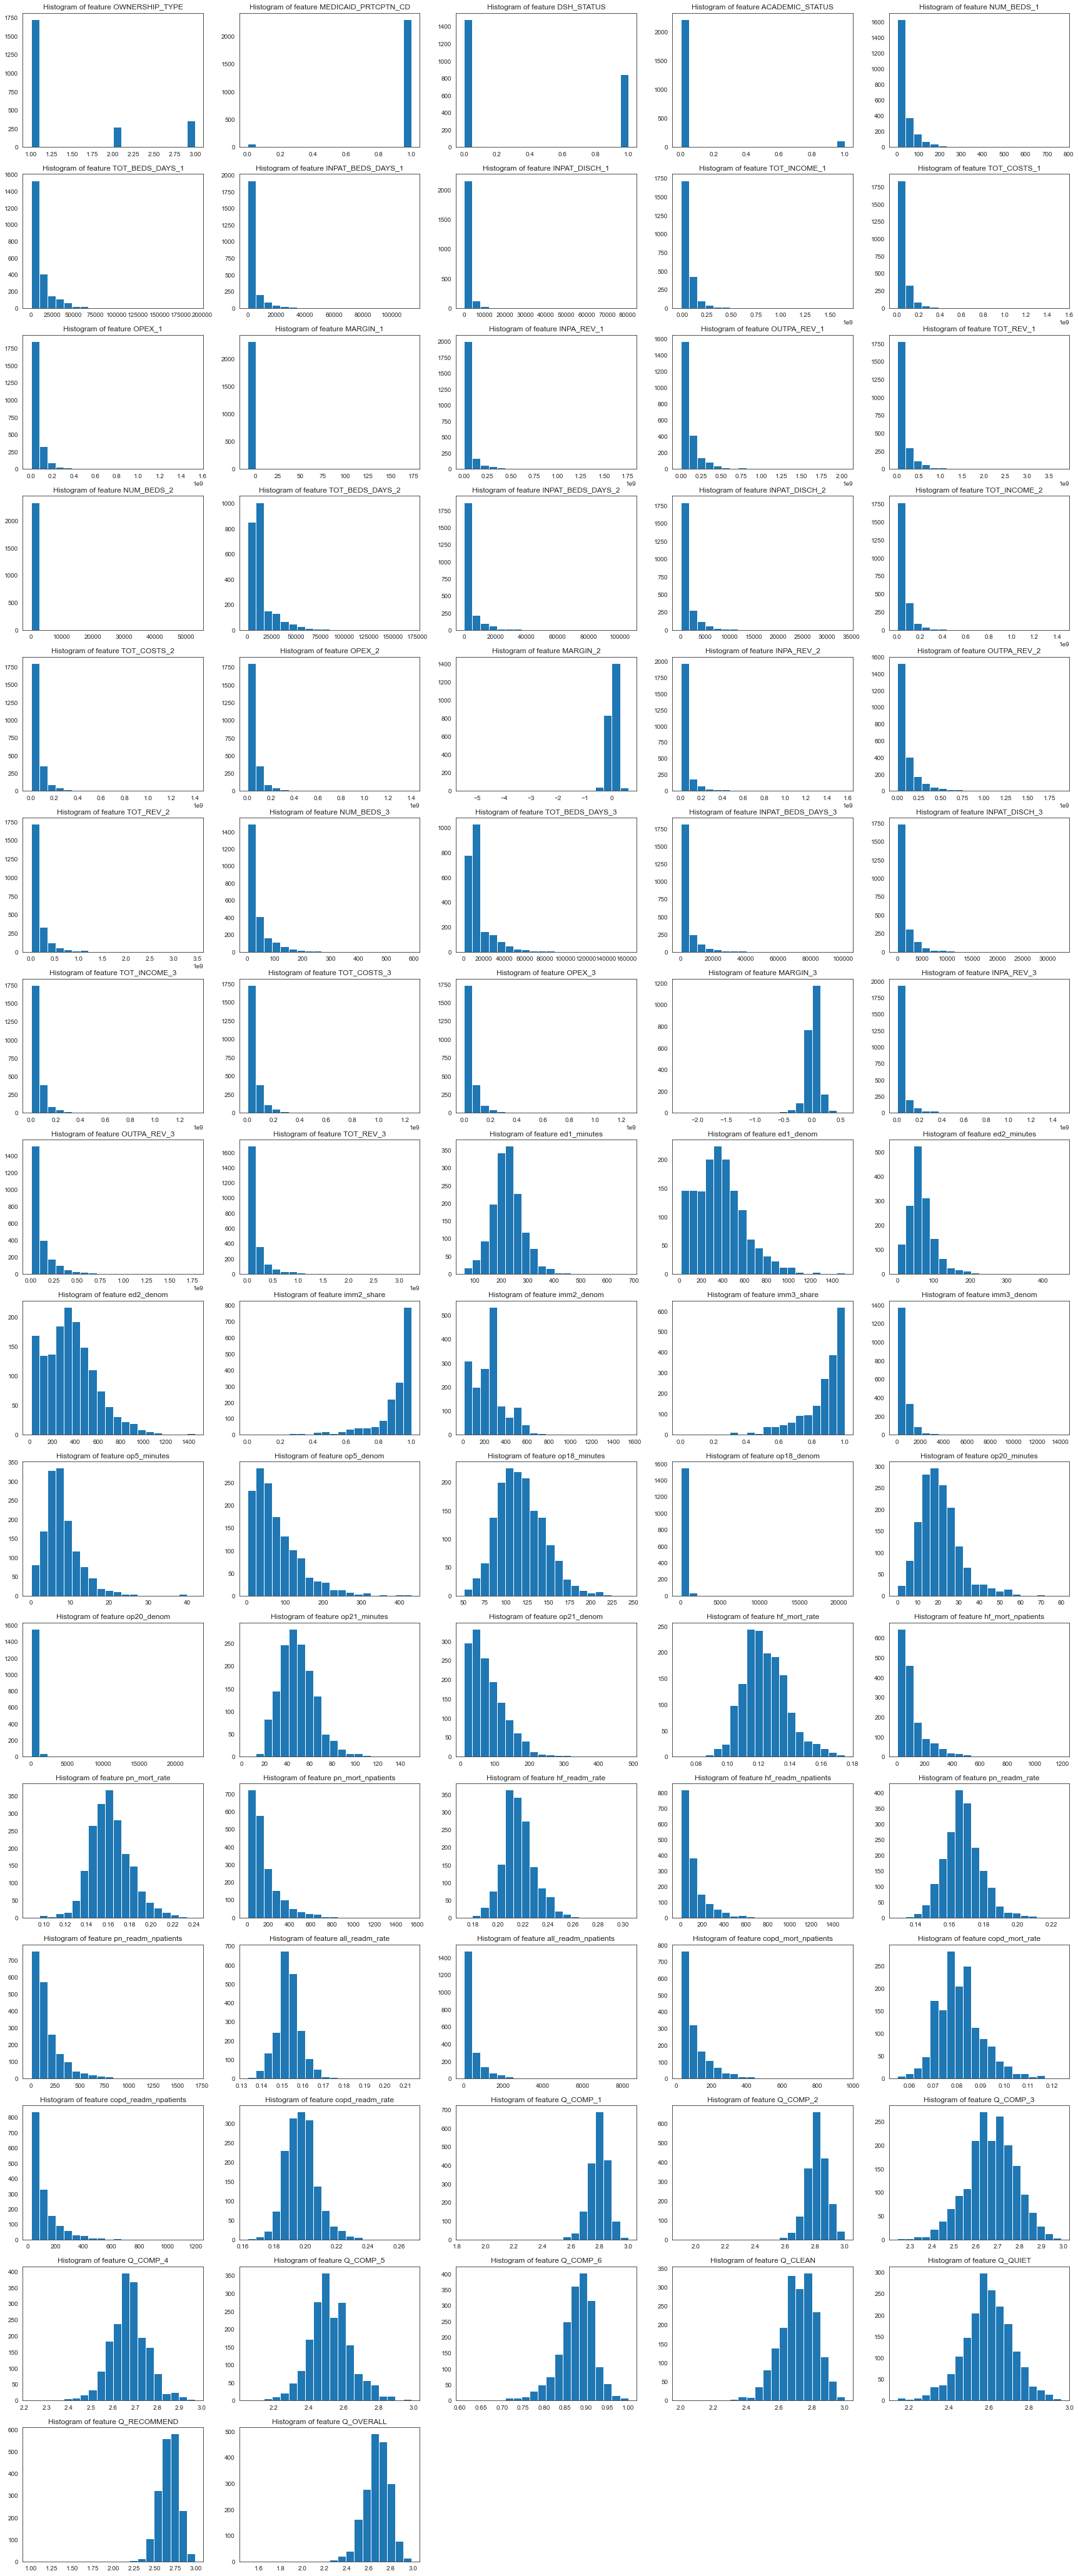

In [9]:
# visualize hospital features
figs, axes = plt.subplots(nrows=16, ncols=5, figsize=(30, 75))
for i in range(16):
    for j in range(5):
        if i*5+j >= len(hospital_features):
            figs.delaxes(axes[i, j])
        else:
            axes[i, j].hist(df[hospital_features[i*5+j]], bins=20)
            axes[i, j].set_title(f'Histogram of feature {hospital_features[i*5+j]}')

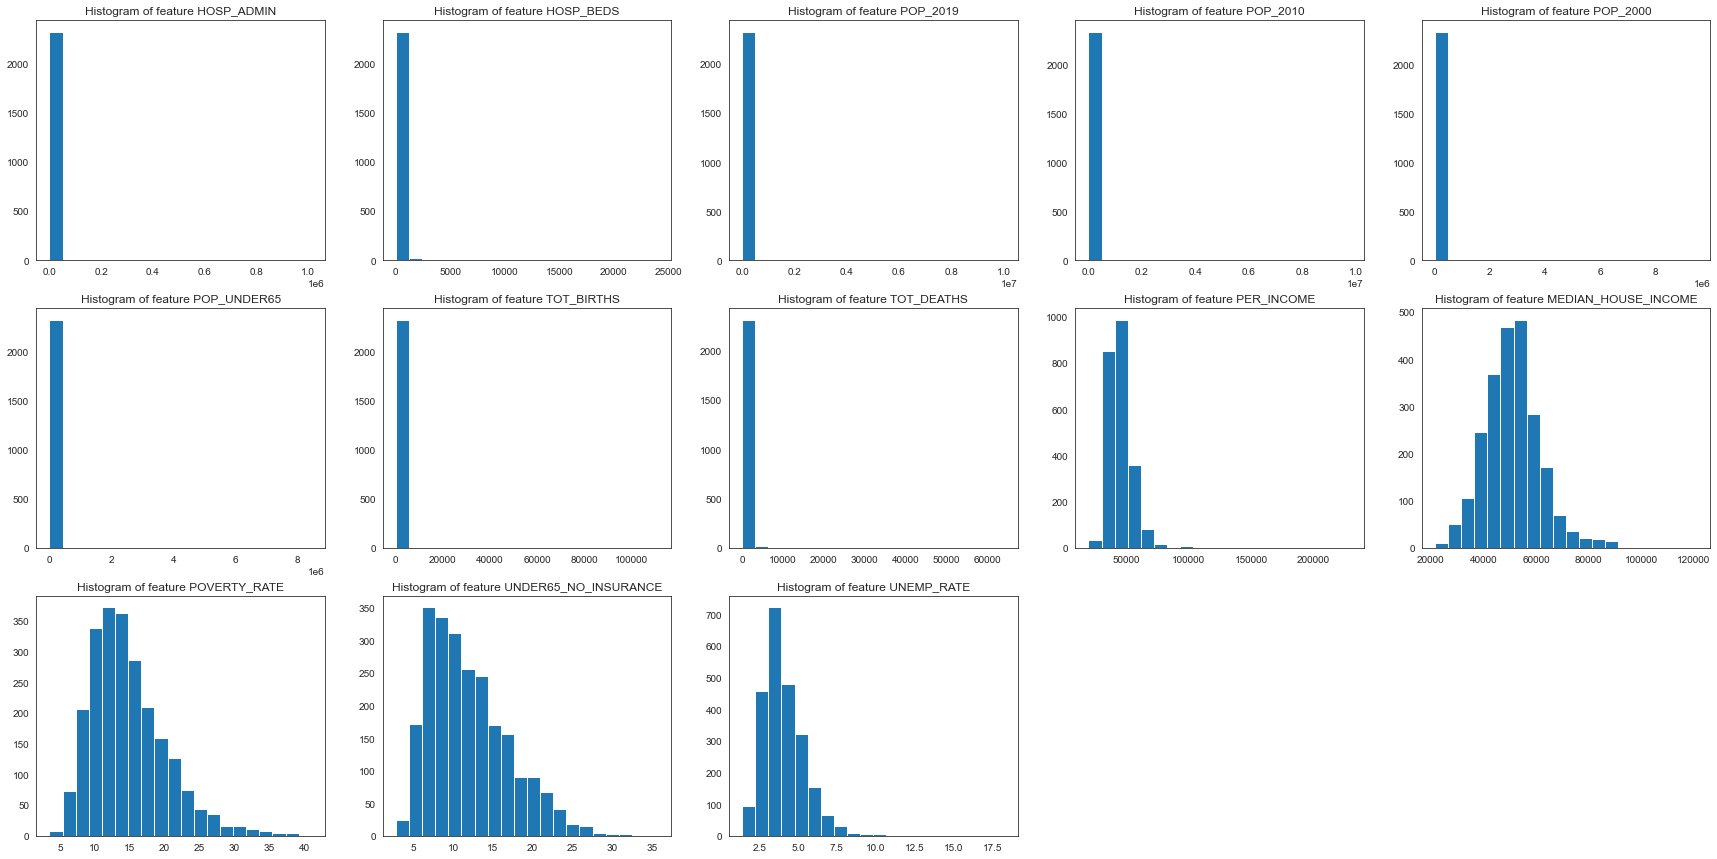

In [10]:
# visualize market features
figs, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
for i in range(3):
    for j in range(5):
        if i*5+j >= len(market_features):
            figs.delaxes(axes[i, j])
        else:
            axes[i, j].hist(df[market_features[i*5+j]], bins=20)
            axes[i, j].set_title(f'Histogram of feature {market_features[i*5+j]}')

# 3. Data preprocessing

In [11]:
# imputation

imputer = SimpleImputer(strategy='mean')
# imputer = SimpleImputer(strategy='median')
# imputer = SimpleImputer(strategy='most_frequent')
# imputer = IterativeImputer()
# imputer = KNNImputer()

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [12]:
X, y = df.iloc[:, 2:], df.iloc[:, 1]
# resampling
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [13]:
# split the dataset into training set and test set, with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)
# we have three dataset, only contain hospital features, market features and all features
X_train_hospital, X_test_hospital = X_train[hospital_features], X_test[hospital_features]
X_train_market, X_test_market = X_train[market_features], X_test[market_features]

In [14]:
# standardization
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train)
X_test_all = scaler.transform(X_test)

scaler = StandardScaler()
X_train_hospital = scaler.fit_transform(X_train_hospital)
X_test_hospital = scaler.transform(X_test_hospital)

scaler = StandardScaler()
X_train_market = scaler.fit_transform(X_train_market)
X_test_market = scaler.transform(X_test_market)

# 4. Models

## 4.1 Logistic Regression

### 4.1.1 Hospital features

In [31]:
all_C = np.logspace(-4, 4, 9)
all_val_f1 = []

# initialize variables
best_c = 0
max_val_f1 = 0

for c in all_C:
    
    # cross validation
    lg = LogisticRegression(C=c)
    val_f1 = np.mean(cross_val_score(lg, X_train_hospital, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('C = {}, validation f1 = {:.4f}'.format(c, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_c = c

C = 0.0001, validation f1 = 0.6852
C = 0.001, validation f1 = 0.7306
C = 0.01, validation f1 = 0.7694
C = 0.1, validation f1 = 0.7860
C = 1.0, validation f1 = 0.8078
C = 10.0, validation f1 = 0.8135
C = 100.0, validation f1 = 0.8174
C = 1000.0, validation f1 = 0.8152
C = 10000.0, validation f1 = 0.8165


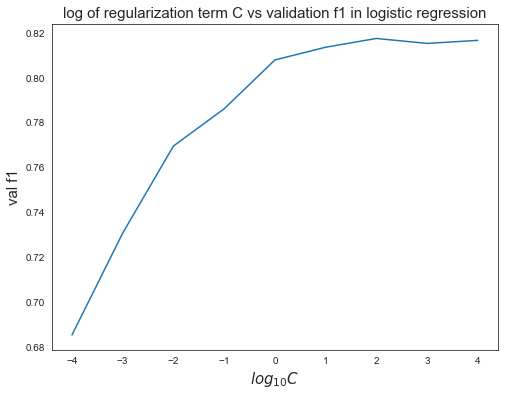

In [32]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_C), all_val_f1)
plt.xlabel('$log_{10}{C}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_C))
plt.title('log of regularization term C vs validation f1 in logistic regression', fontsize=15)
plt.savefig('lr_A.png')
plt.show()

In [33]:
# refit the model using the entire training set using best hyperparameters
best_lg_hospital = LogisticRegression(C=best_c)
best_lg_hospital.fit(X_train_hospital, y_train)
y_pred = best_lg_hospital.predict(X_test_hospital)

test_acc_lg_hospital = accuracy_score(y_test, y_pred)
test_prec_lg_hospital = precision_score(y_test, y_pred)
test_rec_lg_hospital = recall_score(y_test, y_pred)
test_f1_lg_hospital = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_lg_hospital)
print('Test precision = %.4f' % test_prec_lg_hospital)
print('Test recall = %.4f' % test_rec_lg_hospital)
print('Test f1 = %.4f' % test_f1_lg_hospital)

Test accuracy = 0.8126
Test precision = 0.8213
Test recall = 0.7991
Test f1 = 0.8101


### 4.1.2 Market features

In [34]:
all_C = np.logspace(-4, 4, 9)
all_val_f1 = []

# initialize variables
best_c = 0
max_val_f1 = 0

for c in all_C:
    
    # cross validation
    lg = LogisticRegression(C=c)
    val_f1 = np.mean(cross_val_score(lg, X_train_market, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('C = {}, validation f1 = {:.4f}'.format(c, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_c = c

C = 0.0001, validation f1 = 0.6676
C = 0.001, validation f1 = 0.6664
C = 0.01, validation f1 = 0.6811
C = 0.1, validation f1 = 0.7006
C = 1.0, validation f1 = 0.6918
C = 10.0, validation f1 = 0.6895
C = 100.0, validation f1 = 0.6937
C = 1000.0, validation f1 = 0.6943
C = 10000.0, validation f1 = 0.6941


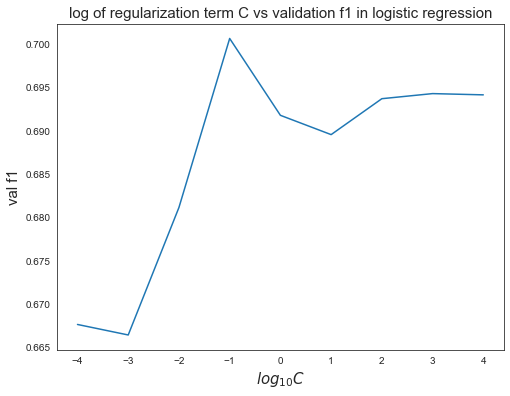

In [35]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_C), all_val_f1)
plt.xlabel('$log_{10}{C}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_C))
plt.title('log of regularization term C vs validation f1 in logistic regression', fontsize=15)
plt.savefig('lr_B.png')
plt.show()

In [36]:
# refit the model using the entire training set using best hyperparameters
best_lg_market = LogisticRegression(C=best_c)
best_lg_market.fit(X_train_market, y_train)
y_pred = best_lg_market.predict(X_test_market)

test_acc_lg_market = accuracy_score(y_test, y_pred)
test_prec_lg_market = precision_score(y_test, y_pred)
test_rec_lg_market = recall_score(y_test, y_pred)
test_f1_lg_market = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_lg_market)
print('Test precision = %.4f' % test_prec_lg_market)
print('Test recall = %.4f' % test_rec_lg_market)
print('Test f1 = %.4f' % test_f1_lg_market)

Test accuracy = 0.6953
Test precision = 0.6727
Test recall = 0.7607
Test f1 = 0.7140


### 4.1.3 All features

In [37]:
all_C = np.logspace(-4, 4, 9)
all_val_f1 = []

# initialize variables
best_c = 0
max_val_f1 = 0

for c in all_C:
    
    # cross validation
    lg = LogisticRegression(C=c)
    val_f1 = np.mean(cross_val_score(lg, X_train_all, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('C = {}, validation f1 = {:.4f}'.format(c, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_c = c

C = 0.0001, validation f1 = 0.7280
C = 0.001, validation f1 = 0.7321
C = 0.01, validation f1 = 0.7575
C = 0.1, validation f1 = 0.7771
C = 1.0, validation f1 = 0.8031
C = 10.0, validation f1 = 0.8147
C = 100.0, validation f1 = 0.8150
C = 1000.0, validation f1 = 0.8137
C = 10000.0, validation f1 = 0.8142


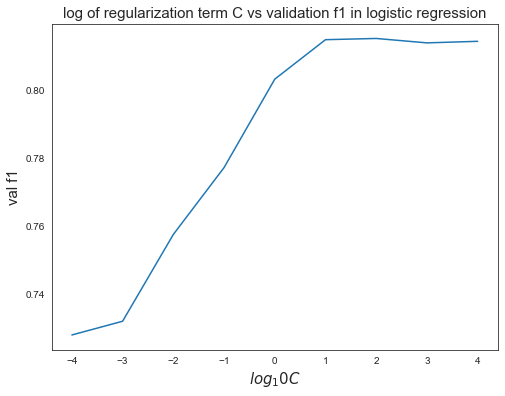

In [38]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_C), all_val_f1)
plt.xlabel('$log_10{C}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_C))
plt.title('log of regularization term C vs validation f1 in logistic regression', fontsize=15)
plt.savefig('lr_C.png')
plt.show()

In [39]:
# refit the model using the entire training set using best hyperparameters
best_lg_all = LogisticRegression(C=best_c)
best_lg_all.fit(X_train_all, y_train)
y_pred = best_lg_all.predict(X_test_all)

test_acc_lg_all = accuracy_score(y_test, y_pred)
test_prec_lg_all = precision_score(y_test, y_pred)
test_rec_lg_all = recall_score(y_test, y_pred)
test_f1_lg_all = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_lg_all)
print('Test precision = %.4f' % test_prec_lg_all)
print('Test recall = %.4f' % test_rec_lg_all)
print('Test f1 = %.4f' % test_f1_lg_all)

Test accuracy = 0.8183
Test precision = 0.8249
Test recall = 0.8081
Test f1 = 0.8164


### 4.1.3 Feature Selction

In [40]:
# select the top 5 features that explains the hospital closing
coef = best_lg_hospital.coef_[0]
top_5_lg_hospital_idx = coef.argsort()[::-1][:5]
top_5_lg_hospital_feats = hospital_features[top_5_lg_hospital_idx]
print('top 5 features using hospital features as logistic regression: \n', top_5_lg_hospital_feats.tolist())

coef = best_lg_market.coef_[0]
top_5_lg_market_idx = coef.argsort()[::-1][:5]
top_5_lg_market_feats = market_features[top_5_lg_market_idx]
print('top 5 features using market features as logistic regression: \n', top_5_lg_market_feats.tolist())

coef = best_lg_all.coef_[0]
top_5_lg_all_idx = coef.argsort()[::-1][:5]
top_5_lg_all_feats = X.columns[top_5_lg_all_idx]
print('top 5 features using all features as logistic regression: \n', top_5_lg_all_feats.tolist())

top 5 features using hospital features as logistic regression: 
 ['OPEX_1', 'op20_denom', 'pn_readm_npatients', 'imm3_denom', 'TOT_INCOME_2']
top 5 features using market features as logistic regression: 
 ['TOT_DEATHS', 'UNDER65_NO_INSURANCE', 'POVERTY_RATE', 'POP_2000', 'MEDIAN_HOUSE_INCOME']
top 5 features using all features as logistic regression: 
 ['TOT_DEATHS', 'OPEX_1', 'op20_denom', 'pn_readm_npatients', 'imm3_denom']


## 4.2 Decision Tree

### 4.2.1 Hospital features

In [41]:
all_max_depth = np.arange(1, X_train_hospital.shape[1]+1)
all_val_f1 = []

# initialize variables
best_max_depth = 0
max_val_f1 = 0

for max_depth in all_max_depth:
    
    # cross validation
    dt = DecisionTreeClassifier(max_depth=max_depth)
    val_f1 = np.mean(cross_val_score(dt, X_train_hospital, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('max_depth = {}, validation f1 = {:.4f}'.format(max_depth, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_max_depth = max_depth

max_depth = 1, validation f1 = 0.7392
max_depth = 2, validation f1 = 0.7751
max_depth = 3, validation f1 = 0.8479
max_depth = 4, validation f1 = 0.8794
max_depth = 5, validation f1 = 0.9199
max_depth = 6, validation f1 = 0.9337
max_depth = 7, validation f1 = 0.9439
max_depth = 8, validation f1 = 0.9499
max_depth = 9, validation f1 = 0.9567
max_depth = 10, validation f1 = 0.9607
max_depth = 11, validation f1 = 0.9626
max_depth = 12, validation f1 = 0.9620
max_depth = 13, validation f1 = 0.9660
max_depth = 14, validation f1 = 0.9631
max_depth = 15, validation f1 = 0.9655
max_depth = 16, validation f1 = 0.9662
max_depth = 17, validation f1 = 0.9676
max_depth = 18, validation f1 = 0.9697
max_depth = 19, validation f1 = 0.9716
max_depth = 20, validation f1 = 0.9699
max_depth = 21, validation f1 = 0.9723
max_depth = 22, validation f1 = 0.9715
max_depth = 23, validation f1 = 0.9731
max_depth = 24, validation f1 = 0.9734
max_depth = 25, validation f1 = 0.9726
max_depth = 26, validation f1 = 0.

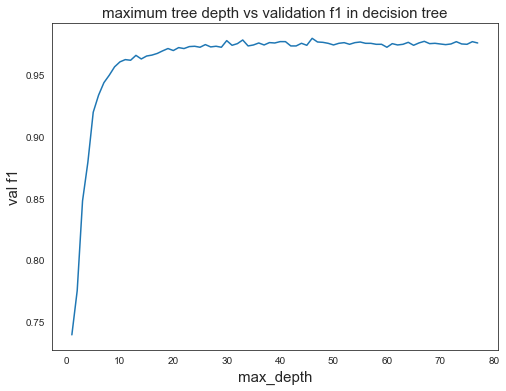

In [42]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_max_depth, all_val_f1)
plt.xlabel('max_depth', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.title('maximum tree depth vs validation f1 in decision tree', fontsize=15)
plt.savefig('dt_A.png')
plt.show()

In [43]:
# refit the model using the entire training set using best hyperparameters
best_dt_hospital = DecisionTreeClassifier(max_depth=best_max_depth)
best_dt_hospital.fit(X_train_hospital, y_train)
y_pred = best_dt_hospital.predict(X_test_hospital)

test_acc_dt_hospital = accuracy_score(y_test, y_pred)
test_prec_dt_hospital = precision_score(y_test, y_pred)
test_rec_dt_hospital = recall_score(y_test, y_pred)
test_f1_dt_hospital = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_dt_hospital)
print('Test precision = %.4f' % test_prec_dt_hospital)
print('Test recall = %.4f' % test_rec_dt_hospital)
print('Test f1 = %.4f' % test_f1_dt_hospital)

Test accuracy = 0.9831
Test precision = 0.9672
Test recall = 1.0000
Test f1 = 0.9834


### 4.2.2 Market features

In [44]:
all_max_depth = np.arange(1, X_train_market.shape[1]+1)
all_val_f1 = []

# initialize variables
best_max_depth = 0
max_val_f1 = 0

for max_depth in all_max_depth:
    
    # cross validation
    dt = DecisionTreeClassifier(max_depth=max_depth)
    val_f1 = np.mean(cross_val_score(dt, X_train_market, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('max_depth = {}, validation f1 = {:.4f}'.format(max_depth, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_max_depth = max_depth

max_depth = 1, validation f1 = 0.5350
max_depth = 2, validation f1 = 0.5373
max_depth = 3, validation f1 = 0.7237
max_depth = 4, validation f1 = 0.7891
max_depth = 5, validation f1 = 0.8155
max_depth = 6, validation f1 = 0.8355
max_depth = 7, validation f1 = 0.8500
max_depth = 8, validation f1 = 0.8795
max_depth = 9, validation f1 = 0.8925
max_depth = 10, validation f1 = 0.9071
max_depth = 11, validation f1 = 0.9219
max_depth = 12, validation f1 = 0.9355
max_depth = 13, validation f1 = 0.9431


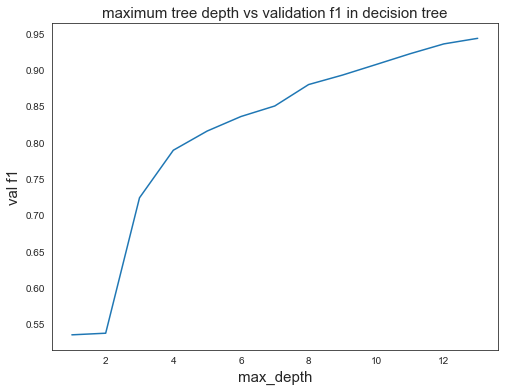

In [45]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_max_depth, all_val_f1)
plt.xlabel('max_depth', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.title('maximum tree depth vs validation f1 in decision tree', fontsize=15)
plt.savefig('dt_B.png')
plt.show()

In [46]:
# refit the model using the entire training set using best hyperparameters
best_dt_market = DecisionTreeClassifier(max_depth=best_max_depth)
best_dt_market.fit(X_train_market, y_train)
y_pred = best_dt_market.predict(X_test_market)

test_acc_dt_market = accuracy_score(y_test, y_pred)
test_prec_dt_market = precision_score(y_test, y_pred)
test_rec_dt_market = recall_score(y_test, y_pred)
test_f1_dt_market = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_dt_market)
print('Test precision = %.4f' % test_prec_dt_market)
print('Test recall = %.4f' % test_rec_dt_market)
print('Test f1 = %.4f' % test_f1_dt_market)

Test accuracy = 0.9436
Test precision = 0.9018
Test recall = 0.9955
Test f1 = 0.9464


### 4.2.3 All features

In [47]:
all_max_depth = np.arange(1, X_train_all.shape[1]+1)
all_val_f1 = []

# initialize variables
best_max_depth = 0
max_val_f1 = 0

for max_depth in all_max_depth:
    
    # cross validation
    dt = DecisionTreeClassifier(max_depth=max_depth)
    val_f1 = np.mean(cross_val_score(dt, X_train_all, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('max_depth = {}, validation f1 = {:.4f}'.format(max_depth, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_max_depth = max_depth

max_depth = 1, validation f1 = 0.7392
max_depth = 2, validation f1 = 0.7890
max_depth = 3, validation f1 = 0.8109
max_depth = 4, validation f1 = 0.8818
max_depth = 5, validation f1 = 0.9004
max_depth = 6, validation f1 = 0.9255
max_depth = 7, validation f1 = 0.9378
max_depth = 8, validation f1 = 0.9502
max_depth = 9, validation f1 = 0.9588
max_depth = 10, validation f1 = 0.9644
max_depth = 11, validation f1 = 0.9657
max_depth = 12, validation f1 = 0.9673
max_depth = 13, validation f1 = 0.9682
max_depth = 14, validation f1 = 0.9686
max_depth = 15, validation f1 = 0.9673
max_depth = 16, validation f1 = 0.9700
max_depth = 17, validation f1 = 0.9697
max_depth = 18, validation f1 = 0.9707
max_depth = 19, validation f1 = 0.9708
max_depth = 20, validation f1 = 0.9713
max_depth = 21, validation f1 = 0.9691
max_depth = 22, validation f1 = 0.9732
max_depth = 23, validation f1 = 0.9742
max_depth = 24, validation f1 = 0.9729
max_depth = 25, validation f1 = 0.9737
max_depth = 26, validation f1 = 0.

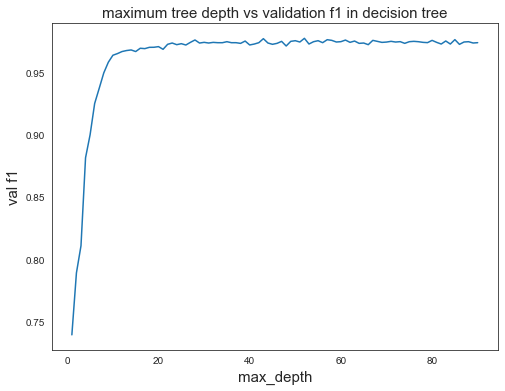

In [48]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_max_depth, all_val_f1)
plt.xlabel('max_depth', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.title('maximum tree depth vs validation f1 in decision tree', fontsize=15)
plt.savefig('dt_C.png')
plt.show()

In [49]:
# refit the model using the entire training set using best hyperparameters
best_dt_all = DecisionTreeClassifier(max_depth=best_max_depth)
best_dt_all.fit(X_train_all, y_train)
y_pred = best_dt_all.predict(X_test_all)

test_acc_dt_all = accuracy_score(y_test, y_pred)
test_prec_dt_all = precision_score(y_test, y_pred)
test_rec_dt_all = recall_score(y_test, y_pred)
test_f1_dt_all = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_dt_all)
print('Test precision = %.4f' % test_prec_dt_all)
print('Test recall = %.4f' % test_rec_dt_all)
print('Test f1 = %.4f' % test_f1_dt_all)

Test accuracy = 0.9718
Test precision = 0.9466
Test recall = 1.0000
Test f1 = 0.9726


In [50]:
# select the top 5 features that explains the hospital closing
coef = best_dt_hospital.feature_importances_
top_5_dt_hospital_idx = coef.argsort()[::-1][:5]
top_5_dt_hospital_feats = hospital_features[top_5_dt_hospital_idx]
print('top 5 features using hospital features as random forest: \n', top_5_dt_hospital_feats.tolist())

coef = best_dt_market.feature_importances_
top_5_dt_market_idx = coef.argsort()[::-1][:5]
top_5_dt_market_feats = market_features[top_5_dt_market_idx]
print('top 5 features using market features as random forest: \n', top_5_dt_market_feats.tolist())

coef = best_dt_all.feature_importances_
top_5_dt_all_idx = coef.argsort()[::-1][:5]
top_5_dt_all_feats = X.columns[top_5_dt_all_idx]
print('top 5 features using all features as random forest: \n', top_5_dt_all_feats.tolist())

top 5 features using hospital features as random forest: 
 ['MARGIN_1', 'TOT_INCOME_1', 'INPAT_DISCH_2', 'NUM_BEDS_2', 'pn_mort_rate']
top 5 features using market features as random forest: 
 ['HOSP_ADMIN', 'PER_INCOME', 'UNDER65_NO_INSURANCE', 'MEDIAN_HOUSE_INCOME', 'POP_2019']
top 5 features using all features as random forest: 
 ['MARGIN_1', 'HOSP_ADMIN', 'NUM_BEDS_2', 'imm3_share', 'OUTPA_REV_2']


## 4.3 Random Forest

### 4.3.1 Hospital features

In [51]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    val_f1 = np.mean(cross_val_score(rfc, X_train_hospital, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.9616
n_estimators = 10, validation f1 = 0.9958
n_estimators = 100, validation f1 = 0.9955
n_estimators = 1000, validation f1 = 0.9958


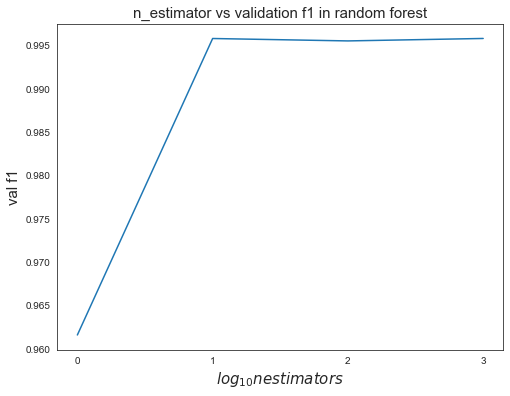

In [52]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in random forest', fontsize=15)
plt.savefig('rf_A.png')
plt.show()

In [53]:
# refit the model using the entire training set using best hyperparameters
best_rfc_hospital = RandomForestClassifier(n_estimators=best_n_estimators)
best_rfc_hospital.fit(X_train_hospital, y_train)
y_pred = best_rfc_hospital.predict(X_test_hospital)

test_acc_rfc_hospital = accuracy_score(y_test, y_pred)
test_prec_rfc_hospital = precision_score(y_test, y_pred)
test_rec_rfc_hospital = recall_score(y_test, y_pred)
test_f1_rfc_hospital = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_rfc_hospital)
print('Test precision = %.4f' % test_prec_rfc_hospital)
print('Test recall = %.4f' % test_rec_rfc_hospital)
print('Test f1 = %.4f' % test_f1_rfc_hospital)

Test accuracy = 0.9989
Test precision = 0.9977
Test recall = 1.0000
Test f1 = 0.9989


### 4.3.2 Market features

In [54]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    val_f1 = np.mean(cross_val_score(rfc, X_train_market, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.9438
n_estimators = 10, validation f1 = 0.9742
n_estimators = 100, validation f1 = 0.9755
n_estimators = 1000, validation f1 = 0.9755


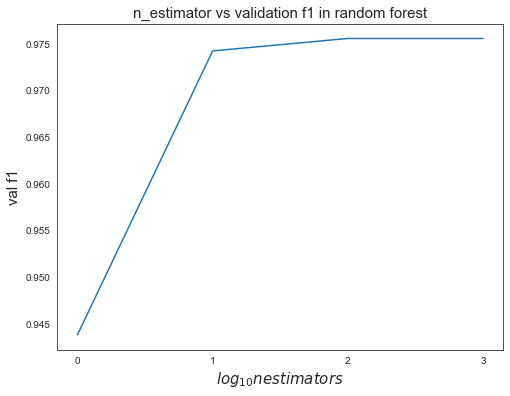

In [55]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in random forest', fontsize=15)
plt.savefig('rf_B.png')
plt.show()

In [56]:
# refit the model using the entire training set using best hyperparameters
best_rfc_market = RandomForestClassifier(n_estimators=best_n_estimators)
best_rfc_market.fit(X_train_market, y_train)
y_pred = best_rfc_market.predict(X_test_market)

test_acc_rfc_market = accuracy_score(y_test, y_pred)
test_prec_rfc_market = precision_score(y_test, y_pred)
test_rec_rfc_market = recall_score(y_test, y_pred)
test_f1_rfc_market = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_rfc_market)
print('Test precision = %.4f' % test_prec_rfc_market)
print('Test recall = %.4f' % test_rec_rfc_market)
print('Test f1 = %.4f' % test_f1_rfc_market)

Test accuracy = 0.9729
Test precision = 0.9486
Test recall = 1.0000
Test f1 = 0.9736


### 4.3.3 All features

In [57]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    val_f1 = np.mean(cross_val_score(rfc, X_train_all, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.9753
n_estimators = 10, validation f1 = 0.9964
n_estimators = 100, validation f1 = 0.9944
n_estimators = 1000, validation f1 = 0.9944


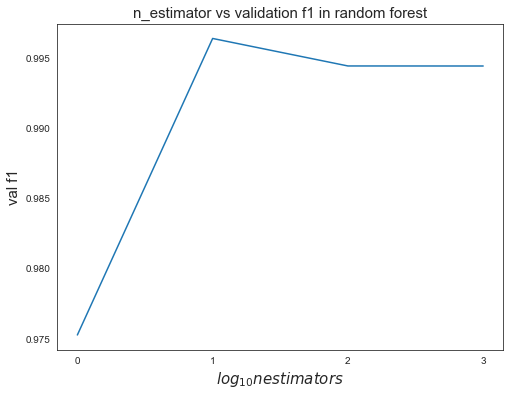

In [58]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in random forest', fontsize=15)
plt.savefig('rf_C.png')
plt.show()

In [59]:
# refit the model using the entire training set using best hyperparameters
best_rfc_all = RandomForestClassifier(n_estimators=best_n_estimators)
best_rfc_all.fit(X_train_all, y_train)
y_pred = best_rfc_all.predict(X_test_all)

test_acc_rfc_all = accuracy_score(y_test, y_pred)
test_prec_rfc_all = precision_score(y_test, y_pred)
test_rec_rfc_all = recall_score(y_test, y_pred)
test_f1_rfc_all = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_rfc_all)
print('Test precision = %.4f' % test_prec_rfc_all)
print('Test recall = %.4f' % test_rec_rfc_all)
print('Test f1 = %.4f' % test_f1_rfc_all)

Test accuracy = 0.9977
Test precision = 0.9955
Test recall = 1.0000
Test f1 = 0.9977


### 4.3.4 Feature Selection

In [60]:
# select the top 5 features that explains the hospital closing
coef = best_rfc_hospital.feature_importances_
top_5_rfc_hospital_idx = coef.argsort()[::-1][:5]
top_5_rfc_hospital_feats = hospital_features[top_5_rfc_hospital_idx]
print('top 5 features using hospital features as random forest: \n', top_5_rfc_hospital_feats.tolist())

coef = best_rfc_market.feature_importances_
top_5_rfc_market_idx = coef.argsort()[::-1][:5]
top_5_rfc_market_feats = market_features[top_5_rfc_market_idx]
print('top 5 features using market features as random forest: \n', top_5_rfc_market_feats.tolist())

coef = best_rfc_all.feature_importances_
top_5_rfc_all_idx = coef.argsort()[::-1][:5]
top_5_rfc_all_feats = X.columns[top_5_rfc_all_idx]
print('top 5 features using all features as random forest: \n', top_5_rfc_all_feats.tolist())

top 5 features using hospital features as random forest: 
 ['MARGIN_1', 'TOT_INCOME_1', 'OPEX_1', 'TOT_COSTS_1', 'imm3_share']
top 5 features using market features as random forest: 
 ['HOSP_ADMIN', 'HOSP_BEDS', 'UNDER65_NO_INSURANCE', 'PER_INCOME', 'POVERTY_RATE']
top 5 features using all features as random forest: 
 ['MARGIN_1', 'OPEX_1', 'HOSP_BEDS', 'TOT_INCOME_1', 'imm3_denom']


## 4.4 XGBoost

### 4.4.1 Hospital features

In [61]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    xgb = XGBClassifier(n_estimators=n_estimators, eval_metric='mlogloss')
    val_f1 = np.mean(cross_val_score(xgb, X_train_hospital, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.9357
n_estimators = 10, validation f1 = 0.9772
n_estimators = 100, validation f1 = 0.9916
n_estimators = 1000, validation f1 = 0.9925


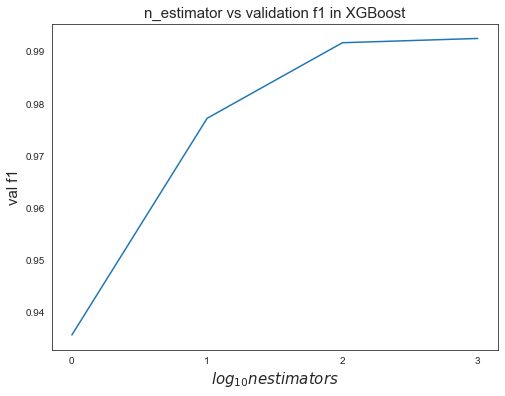

In [62]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in XGBoost', fontsize=15)
plt.savefig('xgb_A.png')
plt.show()

In [63]:
# refit the model using the entire training set using best hyperparameters
best_xgb_hospital = XGBClassifier(n_estimators=best_n_estimators, eval_metric='mlogloss')
best_xgb_hospital.fit(X_train_hospital, y_train)
y_pred = best_xgb_hospital.predict(X_test_hospital)

test_acc_xgb_hospital = accuracy_score(y_test, y_pred)
test_prec_xgb_hospital = precision_score(y_test, y_pred)
test_rec_xgb_hospital = recall_score(y_test, y_pred)
test_f1_xgb_hospital = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_xgb_hospital)
print('Test precision = %.4f' % test_prec_xgb_hospital)
print('Test recall = %.4f' % test_rec_xgb_hospital)
print('Test f1 = %.4f' % test_f1_xgb_hospital)

Test accuracy = 0.9955
Test precision = 0.9911
Test recall = 1.0000
Test f1 = 0.9955


### 4.4.2 Market features

In [64]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    xgb = XGBClassifier(n_estimators=n_estimators, eval_metric='mlogloss')
    val_f1 = np.mean(cross_val_score(xgb, X_train_market, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.8349
n_estimators = 10, validation f1 = 0.9291
n_estimators = 100, validation f1 = 0.9737
n_estimators = 1000, validation f1 = 0.9750


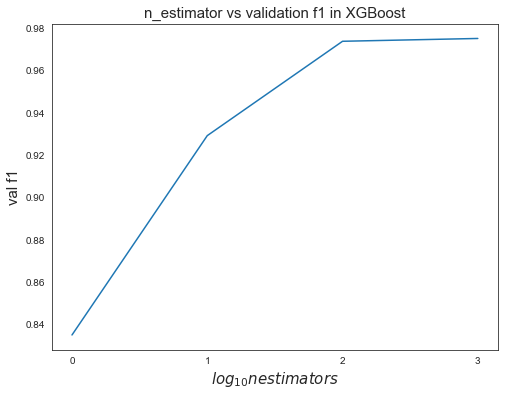

In [65]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in XGBoost', fontsize=15)
plt.savefig('xgb_B.png')
plt.show()

In [66]:
# refit the model using the entire training set using best hyperparameters
best_xgb_market = XGBClassifier(n_estimators=best_n_estimators, eval_metric='mlogloss')
best_xgb_market.fit(X_train_market, y_train)
y_pred = best_xgb_market.predict(X_test_market)

test_acc_xgb_market = accuracy_score(y_test, y_pred)
test_prec_xgb_market = precision_score(y_test, y_pred)
test_rec_xgb_market = recall_score(y_test, y_pred)
test_f1_xgb_market = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_xgb_market)
print('Test precision = %.4f' % test_prec_xgb_market)
print('Test recall = %.4f' % test_rec_xgb_market)
print('Test f1 = %.4f' % test_f1_xgb_market)

Test accuracy = 0.9718
Test precision = 0.9466
Test recall = 1.0000
Test f1 = 0.9726


### 4.4.3 All features

In [67]:
all_n_estimators = [1, 10, 100, 1000]
all_val_f1 = []

# initialize variables
best_n_estimators = 0
max_val_f1 = 0

for n_estimators in all_n_estimators:
    
    # cross validation
    xgb = XGBClassifier(n_estimators=n_estimators, eval_metric='mlogloss')
    val_f1 = np.mean(cross_val_score(xgb, X_train_all, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('n_estimators = {}, validation f1 = {:.4f}'.format(n_estimators, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_n_estimators = n_estimators

n_estimators = 1, validation f1 = 0.9279
n_estimators = 10, validation f1 = 0.9839
n_estimators = 100, validation f1 = 0.9913
n_estimators = 1000, validation f1 = 0.9919


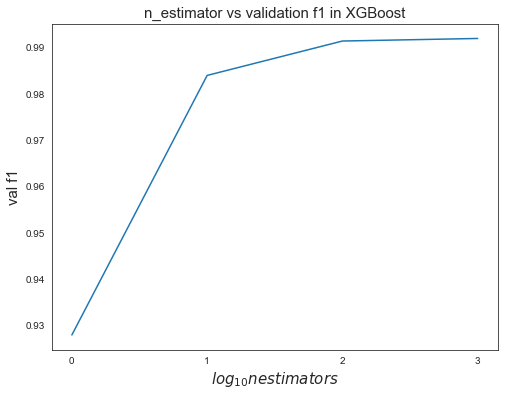

In [68]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(np.log10(all_n_estimators), all_val_f1)
plt.xlabel('$log_{10}{n estimators}$', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(np.log10(all_n_estimators))
plt.title('n_estimator vs validation f1 in XGBoost', fontsize=15)
plt.savefig('xgb_C.png')
plt.show()

In [70]:
# refit the model using the entire training set using best hyperparameters
best_xgb_all = XGBClassifier(n_estimators=n_estimators, eval_metric='mlogloss')
best_xgb_all.fit(X_train_all, y_train)
y_pred = best_xgb_all.predict(X_test_all)

test_acc_xgb_all = accuracy_score(y_test, y_pred)
test_prec_xgb_all = precision_score(y_test, y_pred)
test_rec_xgb_all = recall_score(y_test, y_pred)
test_f1_xgb_all = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_xgb_all)
print('Test precision = %.4f' % test_prec_xgb_all)
print('Test recall = %.4f' % test_rec_xgb_all)
print('Test f1 = %.4f' % test_f1_xgb_all)

Test accuracy = 0.9932
Test precision = 0.9866
Test recall = 1.0000
Test f1 = 0.9933


### 4.4.4 Feature Selection

In [92]:
# select the top 5 features that explains the hospital closing
coef = best_xgb_hospital.feature_importances_
top_5_xgb_hospital_idx = coef.argsort()[::-1][:5]
top_5_xgb_hospital_feats = hospital_features[top_5_xgb_hospital_idx]
print('top 5 features using hospital features as random forest: \n', top_5_xgb_hospital_feats.tolist())

coef = best_xgb_market.feature_importances_
top_5_xgb_market_idx = coef.argsort()[::-1][:5]
top_5_xgb_market_feats = market_features[top_5_xgb_market_idx]
print('top 5 features using market features as random forest: \n', top_5_xgb_market_feats.tolist())

coef = best_xgb_all.feature_importances_
top_5_xgb_all_idx = coef.argsort()[::-1][:5]
top_5_xgb_all_feats = X.columns[top_5_xgb_all_idx]
print('top 5 features using all features as random forest: \n', top_5_xgb_all_feats.tolist())

top 5 features using hospital features as random forest: 
 ['NUM_BEDS_2', 'Q_COMP_1', 'Q_RECOMMEND', 'MARGIN_1', 'pn_mort_rate']
top 5 features using market features as random forest: 
 ['HOSP_ADMIN', 'POP_2019', 'POP_2010', 'PER_INCOME', 'MEDIAN_HOUSE_INCOME']
top 5 features using all features as random forest: 
 ['MARGIN_1', 'POP_2010', 'op18_denom', 'NUM_BEDS_2', 'Q_COMP_2']


## 4.5 Neural Network

### 4.5.1 Hospital features

In [15]:
all_hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,), (60,),
                          (70,), (80,), (90,), (100,), (150,),
                          (200,), (300,), (400,), (500,)]
all_val_f1 = []

# initialize variables
best_hidden_layer_sizes = 0
max_val_f1 = 0

for hidden_layer_sizes in all_hidden_layer_sizes:
    
    # cross validation
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    val_f1 = np.mean(cross_val_score(mlp, X_train_hospital, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('hidden_layer_sizes = {}, validation f1 = {:.4f}'.format(hidden_layer_sizes, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_hidden_layer_sizes = hidden_layer_sizes

hidden_layer_sizes = (10,), validation f1 = 0.9626
hidden_layer_sizes = (20,), validation f1 = 0.9720
hidden_layer_sizes = (30,), validation f1 = 0.9747
hidden_layer_sizes = (40,), validation f1 = 0.9772
hidden_layer_sizes = (50,), validation f1 = 0.9799
hidden_layer_sizes = (60,), validation f1 = 0.9796
hidden_layer_sizes = (70,), validation f1 = 0.9801
hidden_layer_sizes = (80,), validation f1 = 0.9796
hidden_layer_sizes = (90,), validation f1 = 0.9807
hidden_layer_sizes = (100,), validation f1 = 0.9793
hidden_layer_sizes = (150,), validation f1 = 0.9823
hidden_layer_sizes = (200,), validation f1 = 0.9801
hidden_layer_sizes = (300,), validation f1 = 0.9809
hidden_layer_sizes = (400,), validation f1 = 0.9812
hidden_layer_sizes = (500,), validation f1 = 0.9820


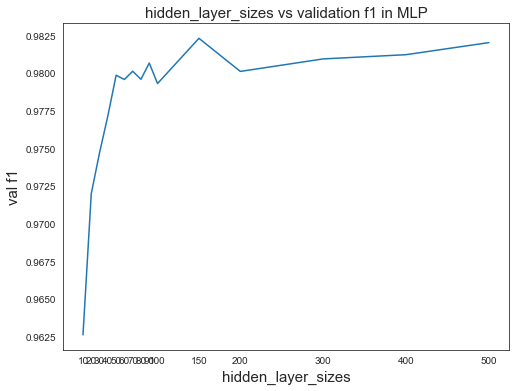

In [16]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_hidden_layer_sizes, all_val_f1)
plt.xlabel('hidden_layer_sizes', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(all_hidden_layer_sizes)
plt.title('hidden_layer_sizes vs validation f1 in MLP', fontsize=15)
plt.savefig('ann_A.png')
plt.show()

In [17]:
# refit the model using the entire training set using best hyperparameters
best_mlp_hospital = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes)
best_mlp_hospital.fit(X_train_hospital, y_train)
y_pred = best_mlp_hospital.predict(X_test_hospital)

test_acc_mlp_hospital = accuracy_score(y_test, y_pred)
test_prec_mlp_hospital = precision_score(y_test, y_pred)
test_rec_mlp_hospital = recall_score(y_test, y_pred)
test_f1_mlp_hospital = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_mlp_hospital)
print('Test precision = %.4f' % test_prec_mlp_hospital)
print('Test recall = %.4f' % test_rec_mlp_hospital)
print('Test f1 = %.4f' % test_f1_mlp_hospital)

Test accuracy = 0.9887
Test precision = 0.9779
Test recall = 1.0000
Test f1 = 0.9888


### 4.5.2 Market features

In [18]:
all_hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,), (60,),
                          (70,), (80,), (90,), (100,), (150,),
                          (200,), (300,), (400,), (500,)]
all_val_f1 = []

# initialize variables
best_hidden_layer_sizes = 0
max_val_f1 = 0

for hidden_layer_sizes in all_hidden_layer_sizes:
    
    # cross validation
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    val_f1 = np.mean(cross_val_score(mlp, X_train_market, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('hidden_layer_sizes = {}, validation f1 = {:.4f}'.format(hidden_layer_sizes, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_hidden_layer_sizes = hidden_layer_sizes

hidden_layer_sizes = (10,), validation f1 = 0.7212
hidden_layer_sizes = (20,), validation f1 = 0.7400
hidden_layer_sizes = (30,), validation f1 = 0.7550
hidden_layer_sizes = (40,), validation f1 = 0.7732
hidden_layer_sizes = (50,), validation f1 = 0.7825
hidden_layer_sizes = (60,), validation f1 = 0.7875
hidden_layer_sizes = (70,), validation f1 = 0.7972
hidden_layer_sizes = (80,), validation f1 = 0.8013
hidden_layer_sizes = (90,), validation f1 = 0.8066
hidden_layer_sizes = (100,), validation f1 = 0.8188
hidden_layer_sizes = (150,), validation f1 = 0.8257
hidden_layer_sizes = (200,), validation f1 = 0.8418
hidden_layer_sizes = (300,), validation f1 = 0.8660
hidden_layer_sizes = (400,), validation f1 = 0.8762
hidden_layer_sizes = (500,), validation f1 = 0.8870


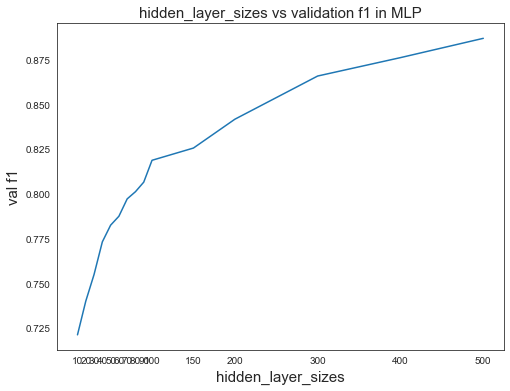

In [19]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_hidden_layer_sizes, all_val_f1)
plt.xlabel('hidden_layer_sizes', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(all_hidden_layer_sizes)
plt.title('hidden_layer_sizes vs validation f1 in MLP', fontsize=15)
plt.savefig('ann_B.png')
plt.show()

In [20]:
# refit the model using the entire training set using best hyperparameters
best_mlp_market = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes)
best_mlp_market.fit(X_train_market, y_train)
y_pred = best_mlp_market.predict(X_test_market)

test_acc_mlp_market = accuracy_score(y_test, y_pred)
test_prec_mlp_market = precision_score(y_test, y_pred)
test_rec_mlp_market = recall_score(y_test, y_pred)
test_f1_mlp_market = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_mlp_market)
print('Test precision = %.4f' % test_prec_mlp_market)
print('Test recall = %.4f' % test_rec_mlp_market)
print('Test f1 = %.4f' % test_f1_mlp_market)

Test accuracy = 0.8770
Test precision = 0.8381
Test recall = 0.9345
Test f1 = 0.8837


### 4.5.3 All features

In [21]:
all_hidden_layer_sizes = [(10,), (20,), (30,), (40,), (50,), (60,),
                          (70,), (80,), (90,), (100,), (150,),
                          (200,), (300,), (400,), (500,)]
all_val_f1 = []

# initialize variables
best_hidden_layer_sizes = 0
max_val_f1 = 0

for hidden_layer_sizes in all_hidden_layer_sizes:
    
    # cross validation
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes)
    val_f1 = np.mean(cross_val_score(mlp, X_train_all, y_train, cv=10, scoring='f1'))
    
    # append result
    all_val_f1.append(val_f1)
    
    # print results
    print('hidden_layer_sizes = {}, validation f1 = {:.4f}'.format(hidden_layer_sizes, val_f1))
    
    # store best hyperparameters
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1
        best_hidden_layer_sizes = hidden_layer_sizes

hidden_layer_sizes = (10,), validation f1 = 0.9697
hidden_layer_sizes = (20,), validation f1 = 0.9734
hidden_layer_sizes = (30,), validation f1 = 0.9753
hidden_layer_sizes = (40,), validation f1 = 0.9772
hidden_layer_sizes = (50,), validation f1 = 0.9788
hidden_layer_sizes = (60,), validation f1 = 0.9785
hidden_layer_sizes = (70,), validation f1 = 0.9788
hidden_layer_sizes = (80,), validation f1 = 0.9813
hidden_layer_sizes = (90,), validation f1 = 0.9826
hidden_layer_sizes = (100,), validation f1 = 0.9818
hidden_layer_sizes = (150,), validation f1 = 0.9812
hidden_layer_sizes = (200,), validation f1 = 0.9815
hidden_layer_sizes = (300,), validation f1 = 0.9834
hidden_layer_sizes = (400,), validation f1 = 0.9831
hidden_layer_sizes = (500,), validation f1 = 0.9810


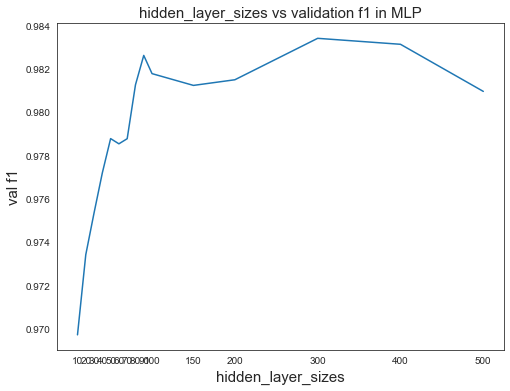

In [22]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(all_hidden_layer_sizes, all_val_f1)
plt.xlabel('hidden_layer_sizes', fontsize=15)
plt.ylabel('val f1', fontsize=15)
plt.xticks(all_hidden_layer_sizes)
plt.title('hidden_layer_sizes vs validation f1 in MLP', fontsize=15)
plt.savefig('ann_C.png')
plt.show()

In [23]:
# refit the model using the entire training set using best hyperparameters
best_mlp_all = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes)
best_mlp_all.fit(X_train_all, y_train)
y_pred = best_mlp_all.predict(X_test_all)

test_acc_mlp_all = accuracy_score(y_test, y_pred)
test_prec_mlp_all = precision_score(y_test, y_pred)
test_rec_mlp_all = recall_score(y_test, y_pred)
test_f1_mlp_all = f1_score(y_test, y_pred)

print('Test accuracy = %.4f' % test_acc_mlp_all)
print('Test precision = %.4f' % test_prec_mlp_all)
print('Test recall = %.4f' % test_rec_mlp_all)
print('Test f1 = %.4f' % test_f1_mlp_all)

Test accuracy = 0.9819
Test precision = 0.9651
Test recall = 1.0000
Test f1 = 0.9823


# 5. Error Analysis

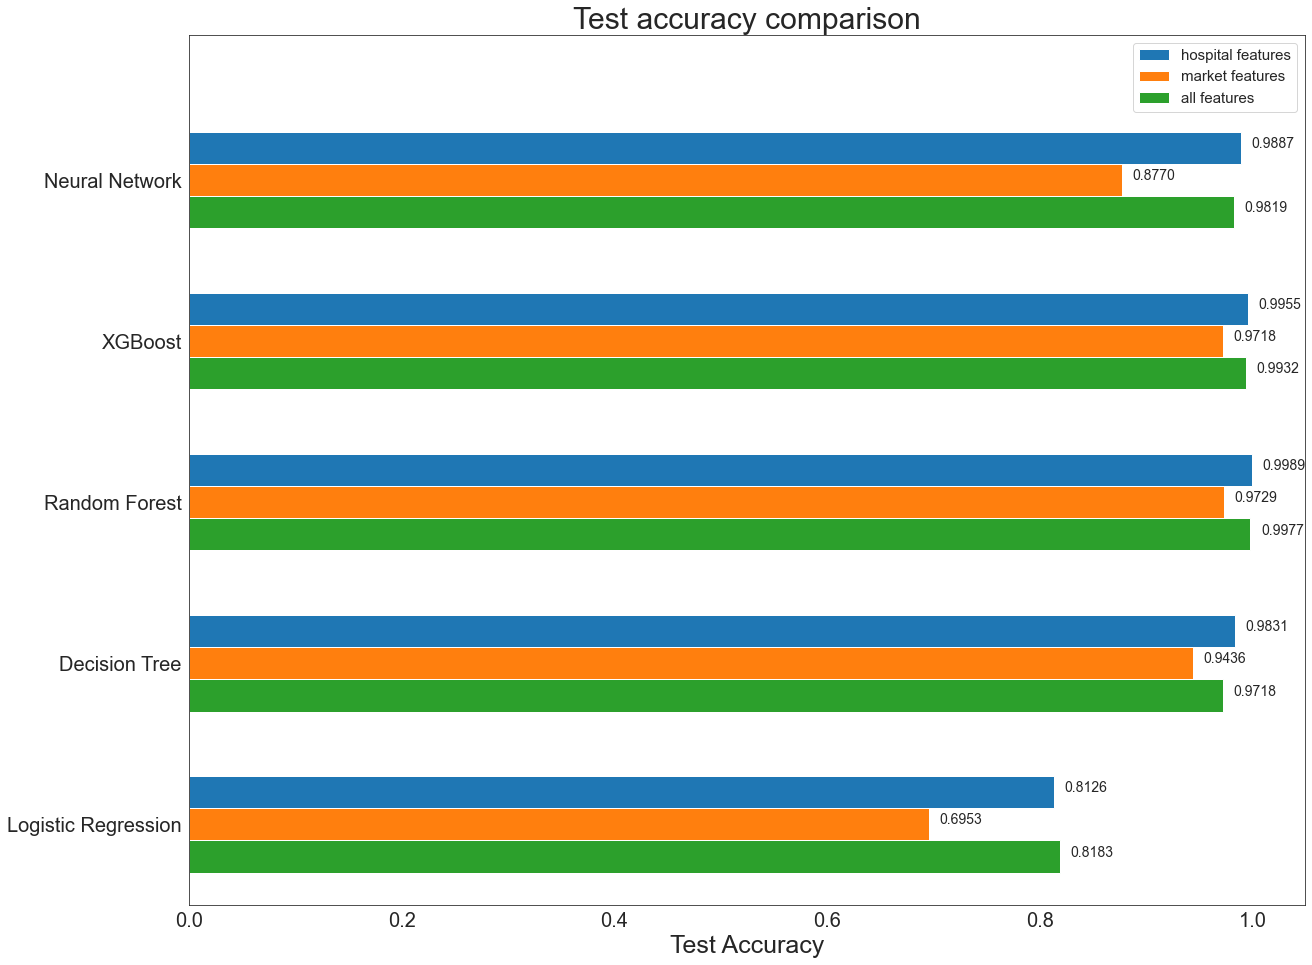

In [83]:
# accuracy comparison
test_acc_hospital = [test_acc_lg_hospital, test_acc_dt_hospital, test_acc_rfc_hospital, test_acc_xgb_hospital, test_acc_mlp_hospital]
test_acc_market = [test_acc_lg_market, test_acc_dt_market, test_acc_rfc_market, test_acc_xgb_market, test_acc_mlp_market]
test_acc_all = [test_acc_lg_all, test_acc_dt_all, test_acc_rfc_all, test_acc_xgb_all, test_acc_mlp_all]

figure = plt.figure(figsize=(20, 16))
y = np.arange(5)
plt.barh(y+0.2, test_acc_hospital, height=0.2, label='hospital features')
for i, v in enumerate(test_acc_hospital):
    plt.text(v+0.01, y[i]+0.2, '%.4f' % v, fontsize=14)
plt.barh(y, test_acc_market, height=0.2, label='market features')
for i, v in enumerate(test_acc_market):
    plt.text(v+0.01, y[i], '%.4f' % v, fontsize=14)
plt.barh(y-0.2, test_acc_all, height=0.2, label='all features')
for i, v in enumerate(test_acc_all):
    plt.text(v+0.01, y[i]-0.2, '%.4f' % v, fontsize=14)

plt.legend(loc='upper right', prop={'size': 15})
plt.xlabel('Test Accuracy', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(y, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'], fontsize=20)
plt.ylim(-0.5, 4.9)
plt.title('Test accuracy comparison', fontsize=30)
plt.savefig('test_accuracy.png')
plt.show()

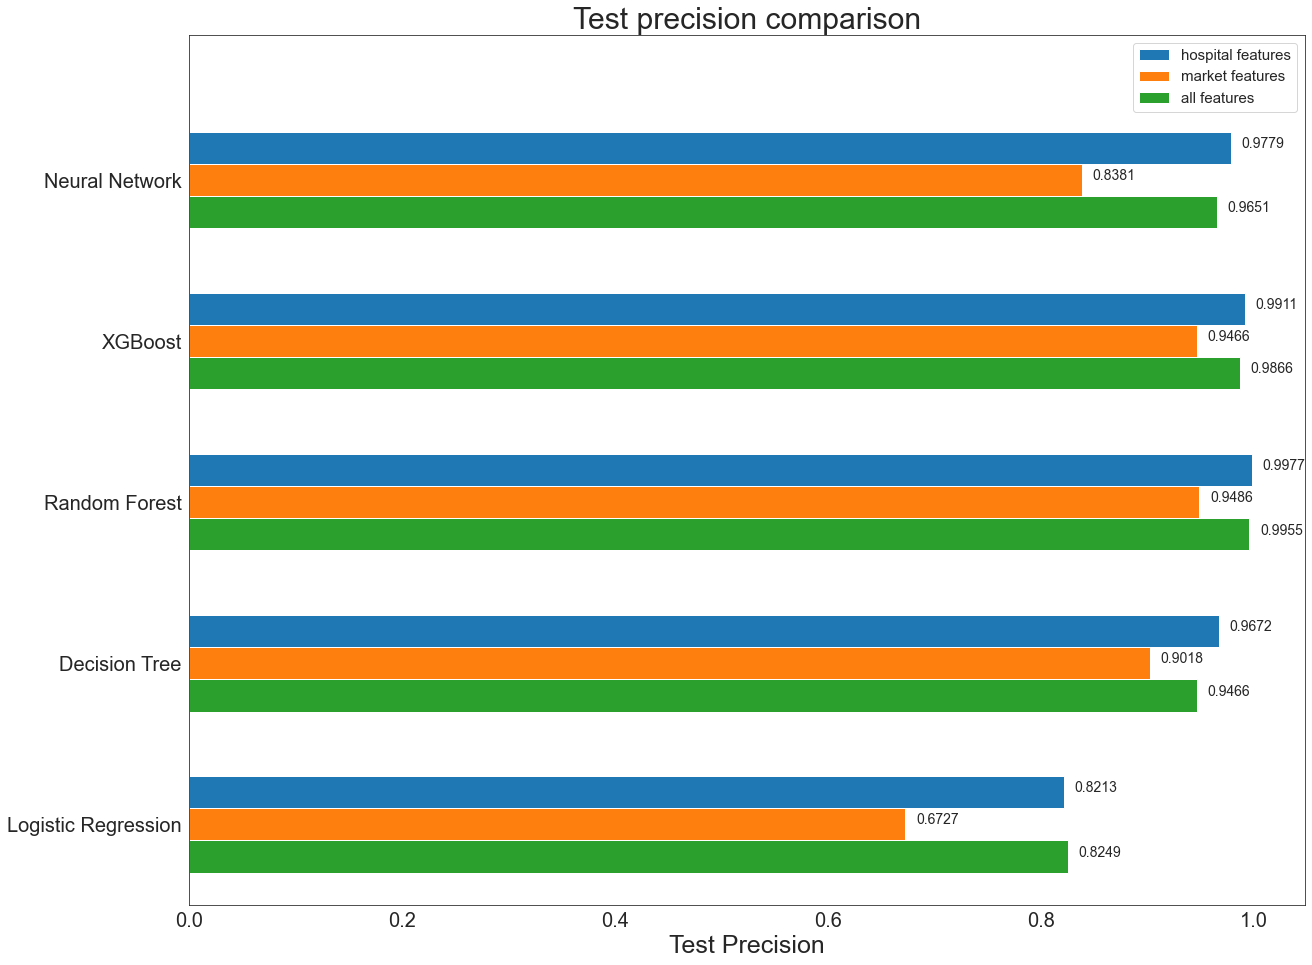

In [84]:
# precision comparison
test_prec_hospital = [test_prec_lg_hospital, test_prec_dt_hospital, test_prec_rfc_hospital, test_prec_xgb_hospital, test_prec_mlp_hospital]
test_prec_market = [test_prec_lg_market, test_prec_dt_market, test_prec_rfc_market, test_prec_xgb_market, test_prec_mlp_market]
test_prec_all = [test_prec_lg_all, test_prec_dt_all, test_prec_rfc_all, test_prec_xgb_all, test_prec_mlp_all]

figure = plt.figure(figsize=(20, 16))
y = np.arange(5)
plt.barh(y+0.2, test_prec_hospital, height=0.2, label='hospital features')
for i, v in enumerate(test_prec_hospital):
    plt.text(v+0.01, y[i]+0.2, '%.4f' % v, fontsize=14)
plt.barh(y, test_prec_market, height=0.2, label='market features')
for i, v in enumerate(test_prec_market):
    plt.text(v+0.01, y[i], '%.4f' % v, fontsize=14)
plt.barh(y-0.2, test_prec_all, height=0.2, label='all features')
for i, v in enumerate(test_prec_all):
    plt.text(v+0.01, y[i]-0.2, '%.4f' % v, fontsize=14)

plt.legend(loc='upper right', prop={'size': 15})
plt.xlabel('Test Precision', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(y, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'], fontsize=20)
plt.ylim(-0.5, 4.9)
plt.title('Test precision comparison', fontsize=30)
plt.savefig('test_precision.png')
plt.show()

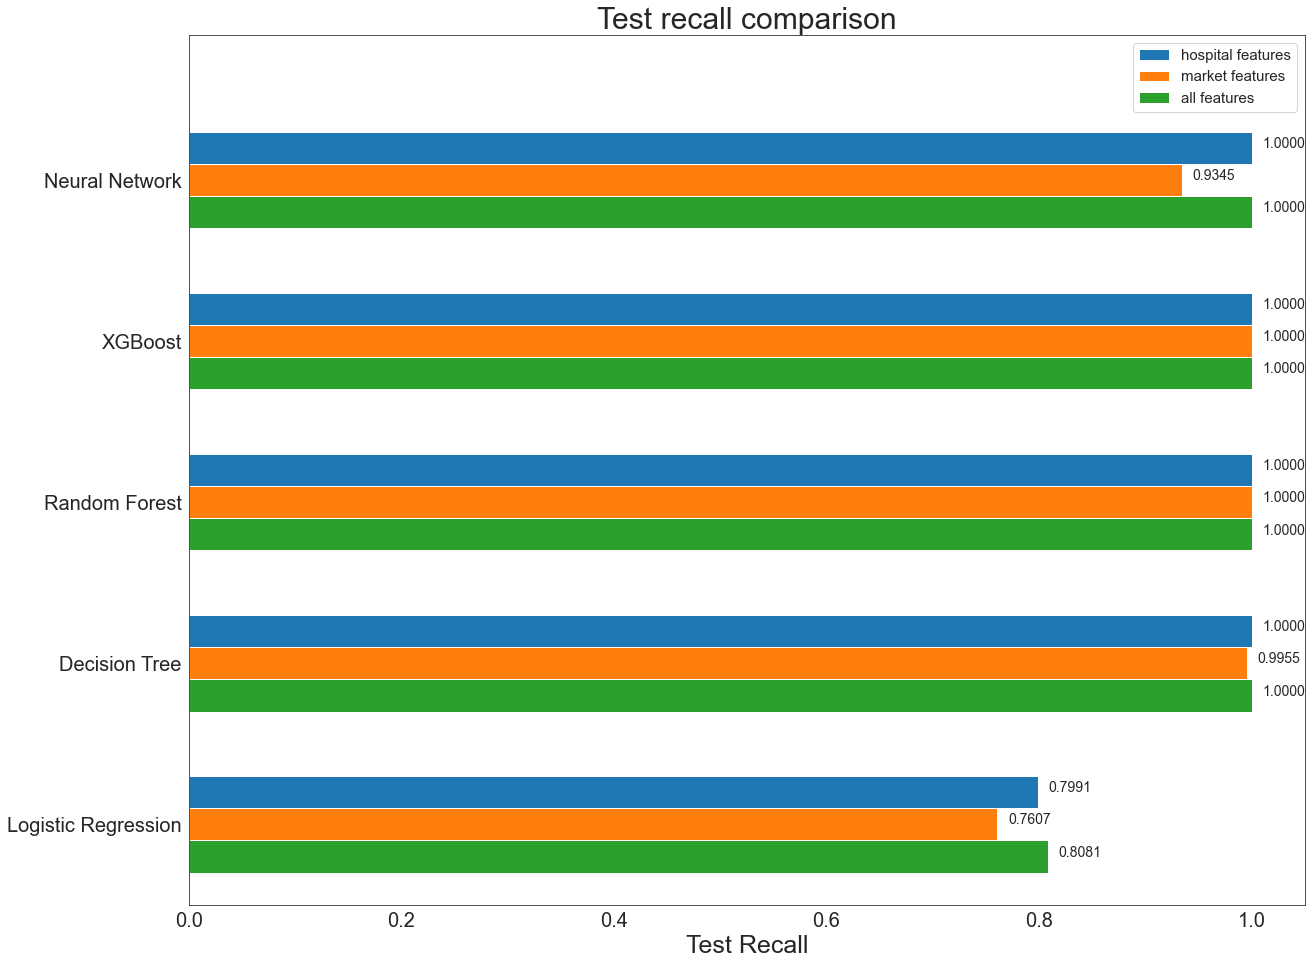

In [88]:
# recall comparison
test_rec_hospital = [test_rec_lg_hospital, test_rec_dt_hospital, test_rec_rfc_hospital, test_rec_xgb_hospital, test_rec_mlp_hospital]
test_rec_market = [test_rec_lg_market, test_rec_dt_market, test_rec_rfc_market, test_rec_xgb_market, test_rec_mlp_market]
test_rec_all = [test_rec_lg_all, test_rec_dt_all, test_rec_rfc_all, test_rec_xgb_all, test_rec_mlp_all]

figure = plt.figure(figsize=(20, 16))
y = np.arange(5)
plt.barh(y+0.2, test_rec_hospital, height=0.2, label='hospital features')
for i, v in enumerate(test_rec_hospital):
    plt.text(v+0.01, y[i]+0.2, '%.4f' % v, fontsize=14)
plt.barh(y, test_rec_market, height=0.2, label='market features')
for i, v in enumerate(test_rec_market):
    plt.text(v+0.01, y[i], '%.4f' % v, fontsize=14)
plt.barh(y-0.2, test_rec_all, height=0.2, label='all features')
for i, v in enumerate(test_rec_all):
    plt.text(v+0.01, y[i]-0.2, '%.4f' % v, fontsize=14)

plt.legend(loc='upper right', prop={'size': 15})
plt.xlabel('Test Recall', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(y, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'], fontsize=20)
plt.ylim(-0.5, 4.9)
plt.title('Test recall comparison', fontsize=30)
plt.savefig('test_recall.png')
plt.show()

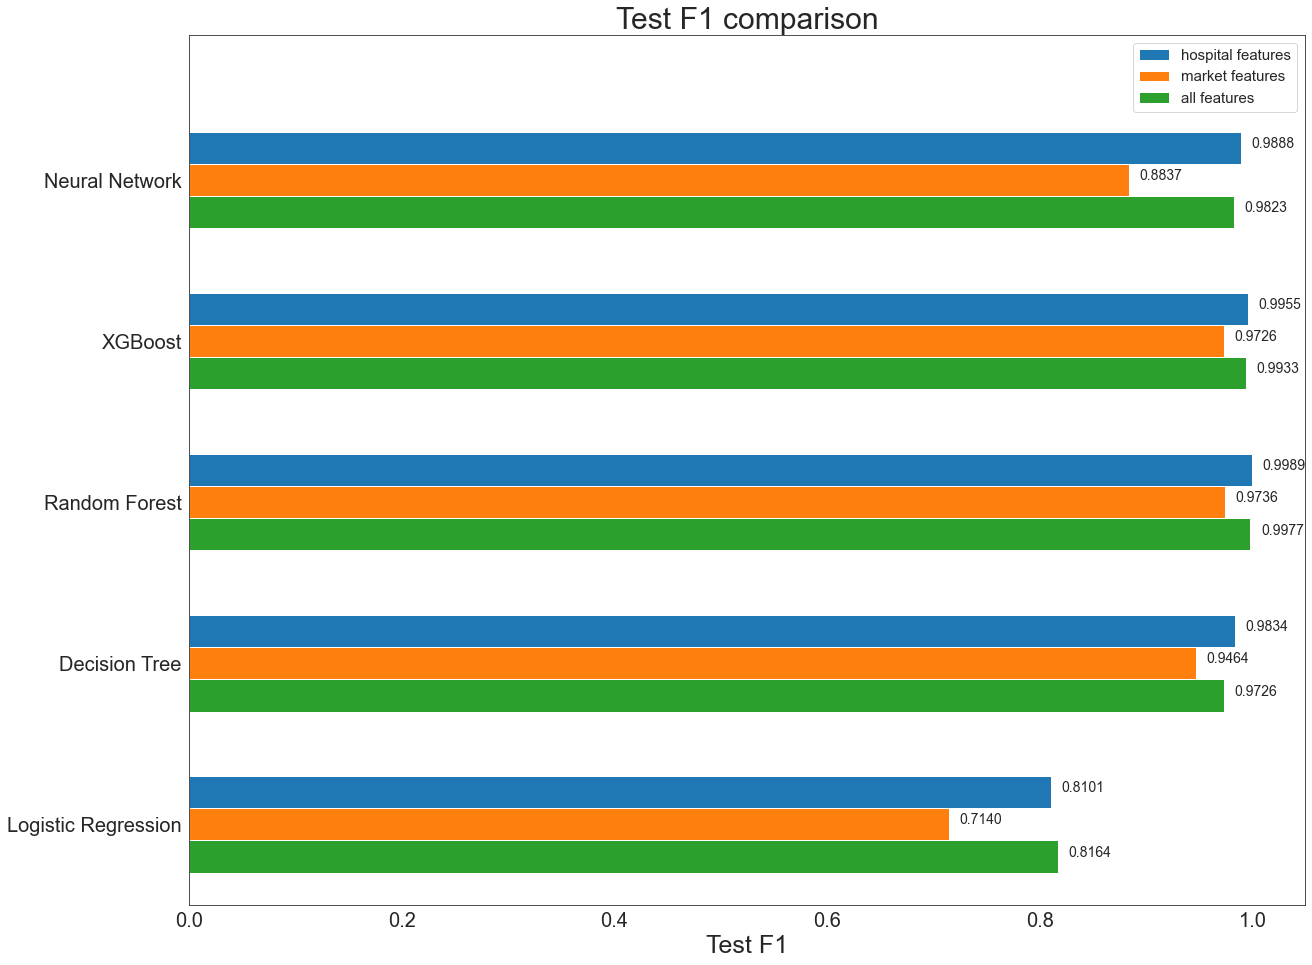

In [85]:
# recall comparison
test_f1_hospital = [test_f1_lg_hospital, test_f1_dt_hospital, test_f1_rfc_hospital, test_f1_xgb_hospital, test_f1_mlp_hospital]
test_f1_market = [test_f1_lg_market, test_f1_dt_market, test_f1_rfc_market, test_f1_xgb_market, test_f1_mlp_market]
test_f1_all = [test_f1_lg_all, test_f1_dt_all, test_f1_rfc_all, test_f1_xgb_all, test_f1_mlp_all]

figure = plt.figure(figsize=(20, 16))
y = np.arange(5)
plt.barh(y+0.2, test_f1_hospital, height=0.2, label='hospital features')
for i, v in enumerate(test_f1_hospital):
    plt.text(v+0.01, y[i]+0.2, '%.4f' % v, fontsize=14)
plt.barh(y, test_f1_market, height=0.2, label='market features')
for i, v in enumerate(test_f1_market):
    plt.text(v+0.01, y[i], '%.4f' % v, fontsize=14)
plt.barh(y-0.2, test_f1_all, height=0.2, label='all features')
for i, v in enumerate(test_f1_all):
    plt.text(v+0.01, y[i]-0.2, '%.4f' % v, fontsize=14)

plt.legend(loc='upper right', prop={'size': 15})
plt.xlabel('Test F1', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(y, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network'], fontsize=20)
plt.ylim(-0.5, 4.9)
plt.title('Test F1 comparison', fontsize=30)
plt.savefig('test_f1.png')
plt.show()

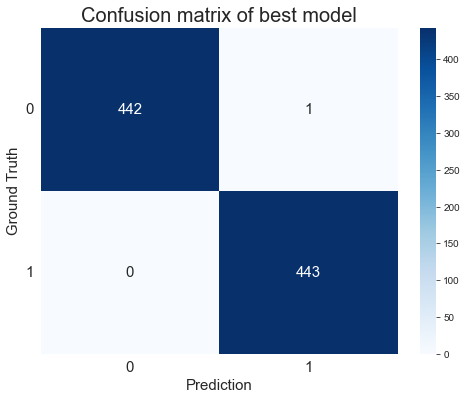

In [87]:
# confusion matrix
y_pred = best_rfc_hospital.predict(X_test_hospital)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15})
plt.xticks(fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Ground Truth', fontsize=15)
plt.title('Confusion matrix of best model', fontsize=20)
plt.savefig('confusion_matrix.png')
plt.show()